# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:63: SyntaxWarning: invalid escape sequence '\$'
<>:63: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Bruger\AppData\Local\Temp\ipykernel_32332\545427782.py:63: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.69,12.55,Entire home/apt,898.00,3,172,2022-06-21,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.69,12.58,Entire home/apt,2600.00,4,59,2022-08-09,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.68,12.58,Entire home/apt,3250.00,3,300,2022-09-10,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.67,12.56,Entire home/apt,725.00,7,24,2022-08-04,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.67,12.56,Entire home/apt,1954.00,3,19,2022-08-22,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


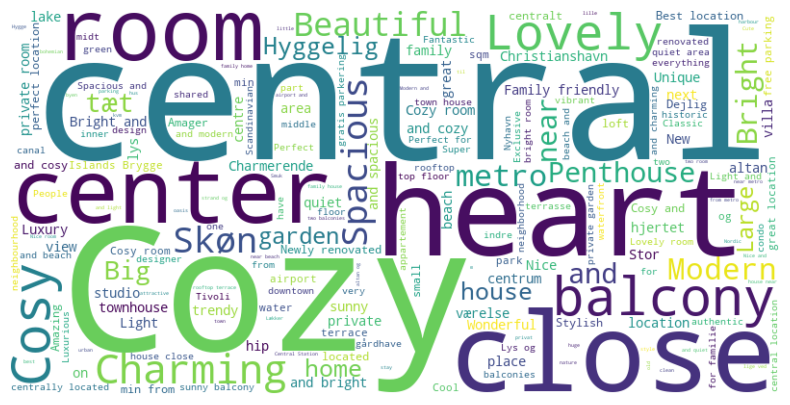

In [374]:
import pandas as pd
import numpy as np
import sklearn as sk
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",
    ]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

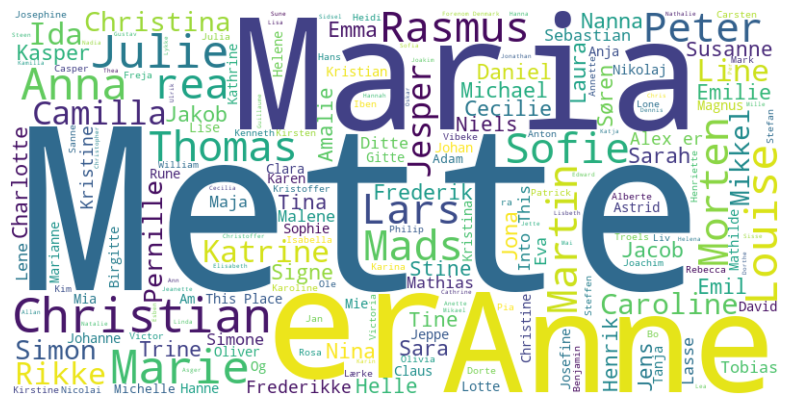

In [375]:
# Split host names like "Simon & Ana" into individual names
def split_names(name):
    names = re.split(r'\s*(?:&|And)\s*', name, flags=re.IGNORECASE)
    return [n.strip() for n in names]

# Function to detect if it is a person name
def is_person_name(name):
    # Remove names with numbers, special characters, or excessive length
    if bool(re.search(r'\d', name)):
        return False
    if len(name) > 20:
        return False
    if bool(re.search(r'[^\w\s]', name)):
        return False
    return True

host_names = data_filtered['host_name'].dropna()

all_names = []
for names in host_names:
    separated_names = split_names(names)
    all_names.extend(separated_names)

person_names = [name for name in all_names if is_person_name(name)]
names_text = ' '.join(person_names)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(names_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

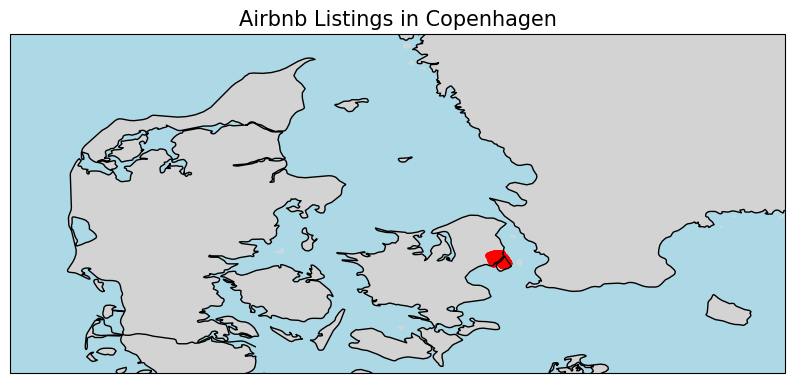

In [376]:
# Initialize the figure and set up a map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.set_extent([7.5, 15.5, 54.5, 58.0], crs=ccrs.PlateCarree())

# Plot the latitude and longitude of each listing
plt.scatter(
    data_filtered['longitude'],
    data_filtered['latitude'],
    color='red',
    s=10,
    transform=ccrs.PlateCarree(),
    label="Listings"
)

plt.title('Airbnb Listings in Copenhagen', fontsize=15)
plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

<Figure size 1200x600 with 0 Axes>

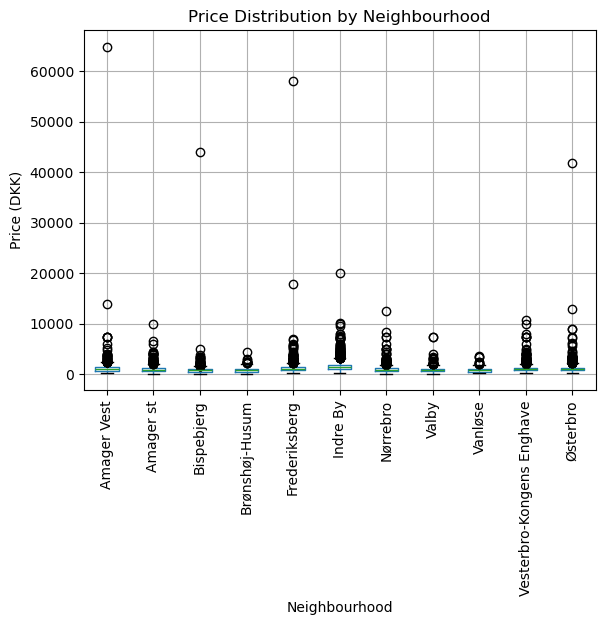

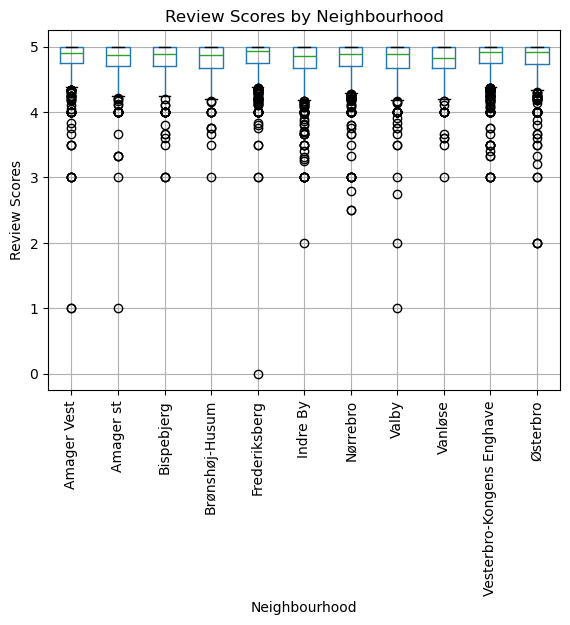

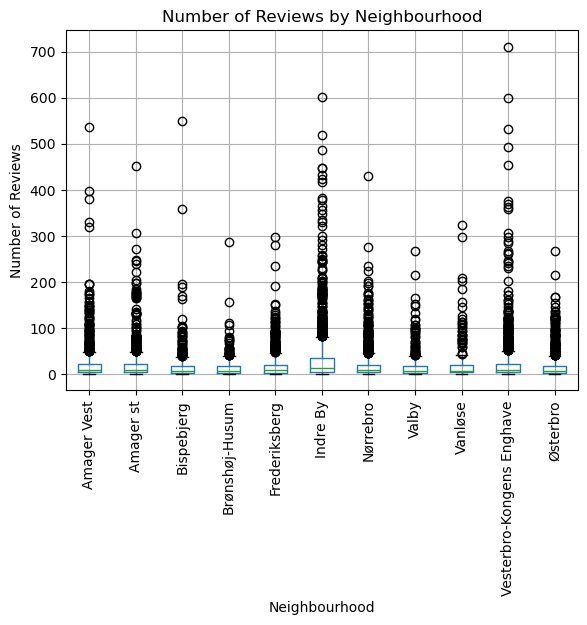

In [377]:
data_filtered = data_filtered.dropna(subset=['price', 'neighbourhood_cleansed'])

# Set up the figure
plt.figure(figsize=(12, 6))

# Boxplot for Price by Neighbourhood
data_filtered.boxplot(column='price', by='neighbourhood_cleansed', grid=True)
plt.title('Price Distribution by Neighbourhood')
plt.suptitle('')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (DKK)')
plt.xticks(rotation=90)

# Boxplot for Review Scores by Neighbourhood
data_filtered.boxplot(column='review_scores_rating', by='neighbourhood_cleansed', grid=True)
plt.title('Review Scores by Neighbourhood')
plt.suptitle('')
plt.xlabel('Neighbourhood')
plt.ylabel('Review Scores')
plt.xticks(rotation=90)

# Boxplot for Number of Reviews by Neighbourhood
data_filtered.boxplot(column='number_of_reviews', by='neighbourhood_cleansed', grid=True)
plt.title('Number of Reviews by Neighbourhood')
plt.suptitle('')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)

plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [378]:
from IPython.display import display

# Define a function to calculate the mode (returns first mode if multiple exist)
def calculate_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Group data by neighbourhood and room_type
grouped_data = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])

# Calculate descriptive statistics for the price
descriptive_stats = grouped_data['price'].agg(
    count='count',
    mean='mean',
    median='median',
    mode=lambda x: calculate_mode(x),
    std_dev='std',
    variance='var',
    min_price='min',
    max_price='max',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.50),
    q75=lambda x: x.quantile(0.75)
).reset_index()

# Display the descriptive statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Limit float precision to 2 decimals

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Set the display width to prevent wrapping
pd.set_option('display.colheader_justify', 'center')  # Center-align headers
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimal points

display(descriptive_stats)

,neighbourhood_cleansed,room_type,count,mean,median,mode,std_dev,variance,min_price,max_price,q25,q50,q75
0,Amager Vest,Entire home/apt,909,1234.23,1050.00,1000.00,832.70,693384.11,250.00,14000.00,814.00,1050.00,1480.00
1,Amager Vest,Private room,148,1032.97,500.00,500.00,5299.02,28079592.77,200.00,64900.00,400.00,500.00,655.00
2,Amager Vest,Shared room,2,1051.50,1051.50,972.00,112.43,12640.50,972.00,1131.00,1011.75,1051.50,1091.25
3,Amager st,Entire home/apt,791,1093.58,900.00,1000.00,721.98,521258.42,240.00,10000.00,700.00,900.00,1200.00
4,Amager st,Hotel room,3,1296.00,1201.00,1149.00,211.18,44599.00,1149.00,1538.00,1175.00,1201.00,1369.50
5,Amager st,Private room,129,549.33,471.00,450.00,294.00,86433.64,135.00,2000.00,400.00,471.00,600.00
6,Amager st,Shared room,1,2575.00,2575.00,2575.00,NaN,NaN,2575.00,2575.00,2575.00,2575.00,2575.00
7,Bispebjerg,Entire home/apt,508,992.59,800.00,700.00,1981.58,3926661.46,235.00,44000.00,600.00,800.00,1000.00
8,Bispebjerg,Private room,95,488.98,400.00,300.00,353.67,125085.36,143.00,3000.00,300.00,400.00,528.50
9,Bispebjerg,Shared room,1,198.00,198.00,198.00,NaN,NaN,198.00,198.00,198.00,198.00,198.00


### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

Linear Regression - MAE: 445.78711778469733, RMSE: 879.3225495545882
Random Forest Regression - MAE: 501.75752747851385, RMSE: 1122.5515773403326
Gradient Boosting Regression - MAE: 439.28574963566854, RMSE: 909.0642922413022


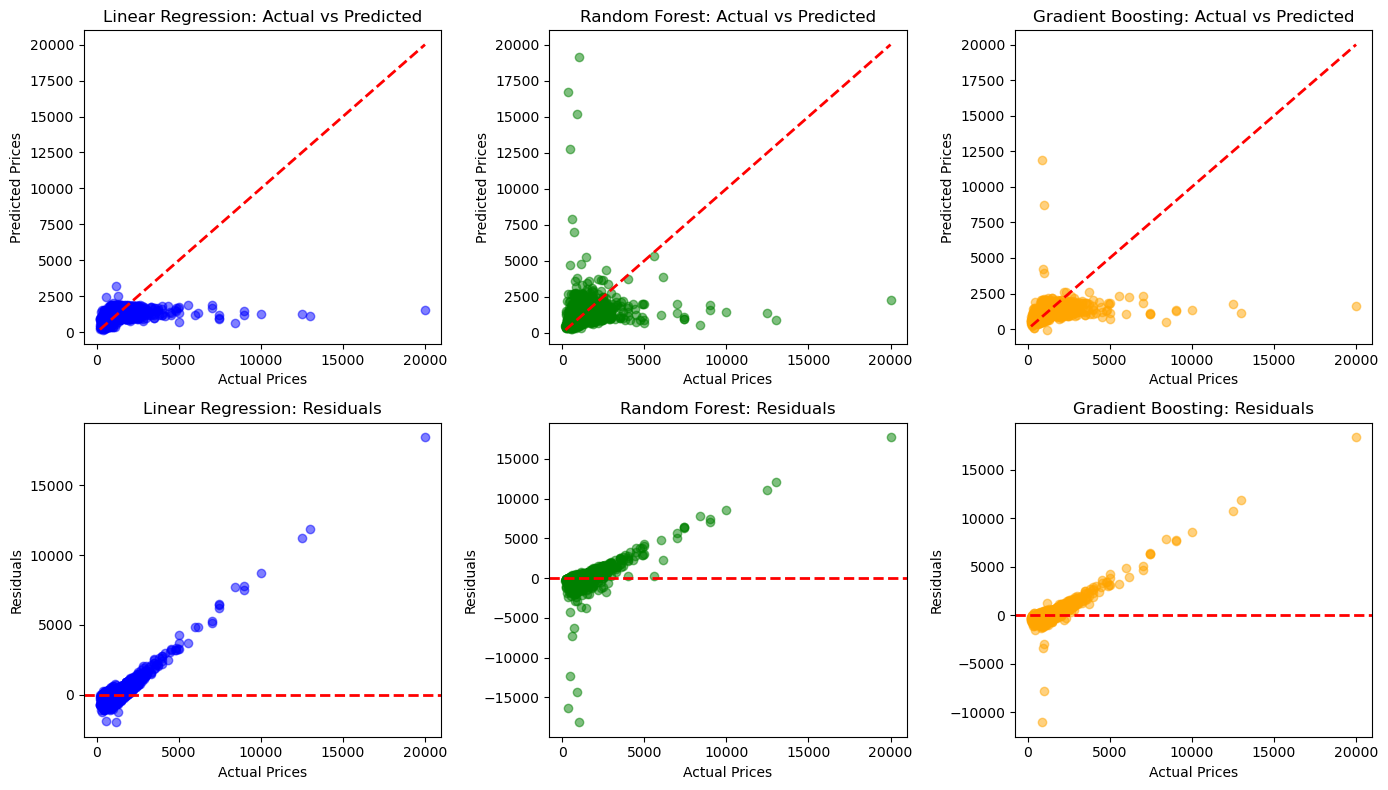

Linear Regression Accuracy: 57.59%
Random Forest Regression Accuracy: 50.97%
Gradient Boosting Regression Accuracy: 58.92%


In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Choose features for the model (self-chosen)
features = ['room_type', 'neighbourhood_cleansed', 'number_of_reviews', 'minimum_nights', 'availability_365']
X = pd.get_dummies(data_filtered[features], drop_first=True)  # Encode categorical variables
y = data_filtered['price']  # Target variable

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##################
# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}")

######################
# Initialize and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest Regression - MAE: {mae_rf}, RMSE: {rmse_rf}")

#################
# Initialize and fit the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting Regression - MAE: {mae_gb}, RMSE: {rmse_gb}")

####################
# Visualization: Actual vs Predicted Prices and Residuals

plt.figure(figsize=(14, 8))

# Actual vs Predicted for Linear Regression
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Residuals for Linear Regression
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_test - y_pred_linear, alpha=0.5, color="blue")
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title("Linear Regression: Residuals")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")

# Actual vs Predicted for Random Forest
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Residuals for Random Forest
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_test - y_pred_rf, alpha=0.5, color="green")
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title("Random Forest: Residuals")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")

# Actual vs Predicted for Gradient Boosting
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_gb, alpha=0.5, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Gradient Boosting: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Residuals for Gradient Boosting
plt.subplot(2, 3, 6)
plt.scatter(y_test, y_test - y_pred_gb, alpha=0.5, color="orange")
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title("Gradient Boosting: Residuals")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

# Define a function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for each model
mape_linear = calculate_mape(y_test, y_pred_linear)
mape_rf = calculate_mape(y_test, y_pred_rf)
mape_gb = calculate_mape(y_test, y_pred_gb)

# Calculate Accuracy for each model
accuracy_linear = 100 - mape_linear
accuracy_rf = 100 - mape_rf
accuracy_gb = 100 - mape_gb

# Print the accuracy percentages
print(f"Linear Regression Accuracy: {accuracy_linear:.2f}%")
print(f"Random Forest Regression Accuracy: {accuracy_rf:.2f}%")
print(f"Gradient Boosting Regression Accuracy: {accuracy_gb:.2f}%")